<a href="https://colab.research.google.com/github/OlehVorobiov/solutions_repo/blob/main/docs/Interactives/ForcedDampedPendulum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

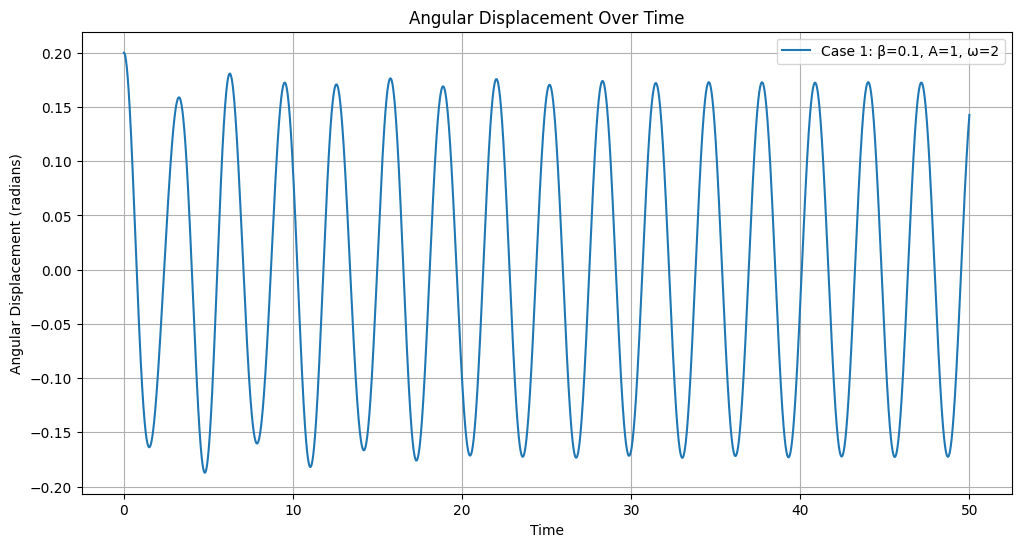

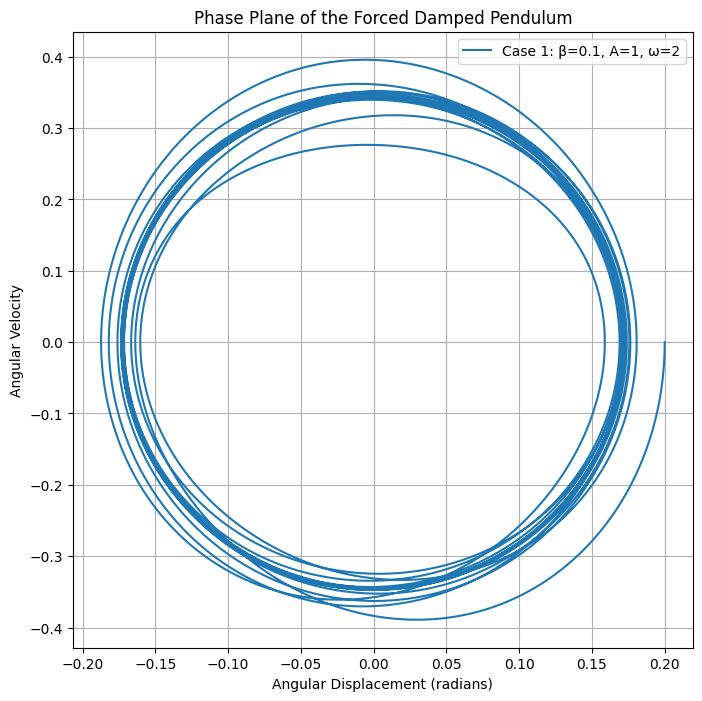

In [125]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define the forced damped pendulum equations
def forced_damped_pendulum(t, state, b, omega_0, A, omega):
    theta, omega_theta = state
    dtheta_dt = omega_theta
    domega_dt = -2 * b * omega_theta - omega_0**2 * np.sin(theta) + A * np.cos(omega * t)
    return [dtheta_dt, domega_dt]

# Simulation function for multiple cases
def simulate_cases(cases, initial_state=[0.2, 0.0], time_span=(0, 50), steps=10000):
    time_eval = np.linspace(time_span[0], time_span[1], steps)

    plt.figure(figsize=(12, 6))
    for i, (b, A, omega) in enumerate(cases):
        omega_0 = np.sqrt(9.81 / 1)  # constant if L = 1

        sol = solve_ivp(
            forced_damped_pendulum,
            time_span,
            initial_state,
            args=(b, omega_0, A, omega),
            t_eval=time_eval,
            method='RK45'
        )

        theta = np.unwrap(sol.y[0])
        omega_theta = sol.y[1]

        plt.plot(sol.t, theta, label=f"Case {i+1}: β={b}, A={A}, ω={omega}")

    plt.title("Angular Displacement Over Time")
    plt.xlabel("Time")
    plt.ylabel("Angular Displacement (radians)")
    plt.grid()
    plt.legend()
    plt.show()

    plt.figure(figsize=(8, 8))
    for i, (b, A, omega) in enumerate(cases):
        omega_0 = np.sqrt(9.81 / 1.0)
        sol = solve_ivp(
            forced_damped_pendulum,
            time_span,
            initial_state,
            args=(b, omega_0, A, omega),
            t_eval=time_eval,
            method='RK45'
        )

        theta = np.unwrap(sol.y[0])
        omega_theta = sol.y[1]

        plt.plot(theta, omega_theta, label=f"Case {i+1}: β={b}, A={A}, ω={omega}")

    plt.title("Phase Plane of the Forced Damped Pendulum")
    plt.xlabel("Angular Displacement (radians)")
    plt.ylabel("Angular Velocity")
    plt.grid()
    plt.legend()
    plt.show()

# Example usage: list of (b, A, omega)
cases = [

    (0.1, 1, 2)

]

simulate_cases(cases)



